In [1]:
# Modeling nuclear binding energies with an extended semiempirical mass formula

# Lasso and Ridge regression

In [1]:
%matplotlib inline 

import numpy as np
import itertools
import matplotlib.pyplot as plt
import csv
import random

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [46]:
def rmserror(predicted, exp):
    return np.sqrt(np.sum(np.power(predicted - exp, 2)/len(predicted)))

def oddeven(nneu,npro):
    if(nneu % 2 == 0 and npro % 2 == 0):
        return 1
    elif (nneu % 2 == 1 and npro % 2 == 1):
        return -1
    else:
        return 0

def fit_alpha_zero(model, data_x, data_y):
    regr = model(fit_intercept = False, alpha = 0.0)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)
    
    return (rmserror(data_y_th, data_y), regr.coef_)

def fit_alpha_dependence(alpha_list, model, data_x, data_y):
    rms_list = []
    coef_list = []
    for a in alpha_list:
        regr = model(fit_intercept = False, alpha = a)
        regr.fit(data_x, data_y)
        if model == linear_model.Lasso:
            data_y_th = [x[0] for x in regr.predict(data_x)]
        else:
            data_y_th = regr.predict(data_x)
    
        rms_list.append(rmserror(data_y_th, data_y))
        coef_list.append(regr.coef_)
        
    return (rms_list, coef_list)

In [21]:
# read data and transform
data_raw = np.genfromtxt("data.dat",usecols = (0,1,2,5), unpack = True).transpose()
nproton = data_raw[:,1]
nmass = data_raw[:,0]
nneutron = nmass - nproton
ndiff = nneutron - nproton
beta2 = data_raw[:,2]

# odd or even nuclei
oddeven_eff = np.zeros(nmass.shape)
for a in range(len(nmass)):
    oddeven_eff[a] = oddeven(nneutron[a],nproton[a])
    
# measurements
data_y = -data_raw[:,3]

### 1 parameter - volume term

In [64]:
data_x = nmass.reshape(-1, 1)

alpha_list = np.logspace(-2, 2, num = 100, endpoint = True)

Coefficients:  [7.95257505]
rms error [MeV]:  48.7144220204424


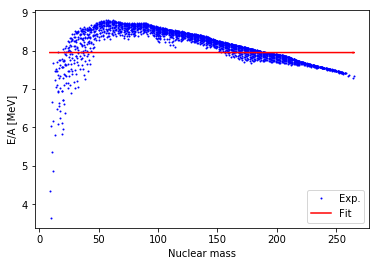

In [65]:
# Standard least squares
regr_lsq_1par = linear_model.LinearRegression(fit_intercept = False)
regr_lsq_1par.fit(data_x, data_y)
data_y_th = regr_lsq_1par.predict(data_x)

print("Coefficients: ", regr_lsq_1par.coef_)
print("rms error [MeV]: ", rmserror(data_y_th, data_y))

#print(data_x.reshape(-1, 1), data_y, data_y_th)

# Figures for the first fit
plt.figure(1)
plt.plot(nmass,data_y/nmass,'bo', markersize = 2, markeredgewidth = 0.0)
plt.plot(nmass,data_y_th/nmass,'r-')
plt.xlabel("Nuclear mass")
plt.ylabel("E/A [MeV]")
plt.legend(("Exp.", "Fit"), loc = "lower right")
plt.show(1)

For alpha =  0.01  coef:  7.952574594972112  and rms:  48.71442202048927  MeV


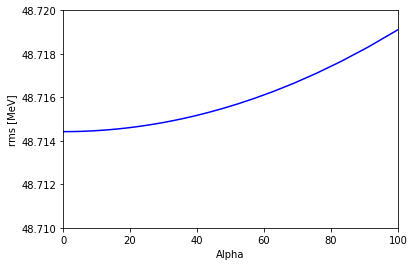

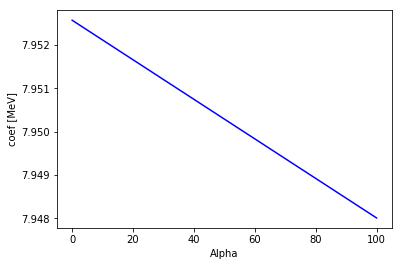

In [66]:
# Lasso regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Lasso(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = [x[0] for x in regr.predict(data_x)]

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.axis([0, 100, 48.71, 48.72])
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

For alpha =  0.01  coef:  [7.95257505]  and rms:  48.71442202044241  MeV


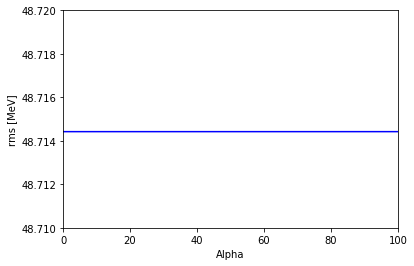

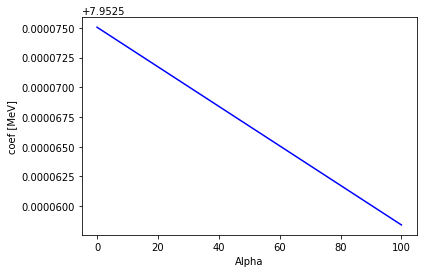

In [67]:
# Ridge regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Ridge(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")

plt.figure(4)
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.axis([0, 100, 48.71, 48.72])
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show(4)

plt.figure(5)
plt.plot(np.asarray(alpha_list), np.asarray(coef_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show(5)

### 2 parameters - volume and surface terms

In [68]:
surf = np.power(nmass,2.0/3.0)
data_x = np.column_stack([nmass, surf])

Coefficients:  [ 5.62341266 12.92433609]
rms error [MeV]:  27.298429785935117


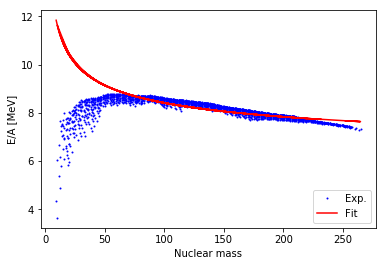

In [69]:
regr_lsq_2par = linear_model.LinearRegression(fit_intercept = False)
regr_lsq_2par.fit(data_x,data_y)
data_y_th = regr_lsq_2par.predict(data_x)

print("Coefficients: ",regr_lsq_2par.coef_)
print("rms error [MeV]: ",rmserror(data_y_th,data_y))

# Figures for the second fit
plt.figure(6)
plt.plot(nmass,data_y/nmass,'bo',markersize = 2, markeredgewidth = 0.0)
plt.plot(nmass,data_y_th/nmass,'r-')
plt.xlabel("Nuclear mass")
plt.ylabel("E/A [MeV]")
plt.legend(("Exp.","Fit"),loc = "lower right")
plt.show(6)

For alpha =  0.01  coef:  [ 5.62368316 12.9228415 ]  and rms:  27.298430185210307  MeV


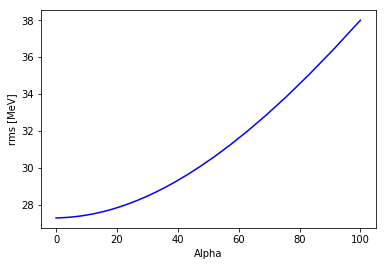

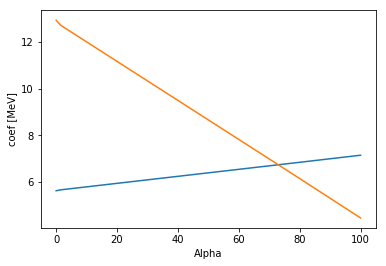

In [71]:
# Lasso regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Lasso(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")
    
plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

For alpha =  0.01  coef:  [ 5.62341367 12.9243305 ]  and rms:  27.298429785940712  MeV


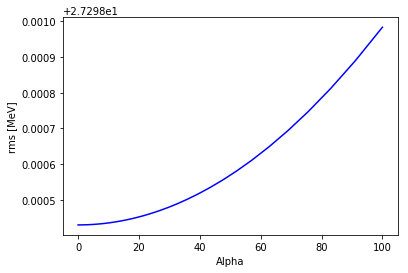

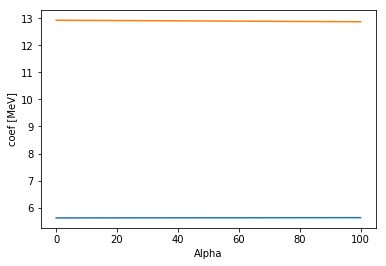

In [72]:
# Ridge regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Ridge(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

### 3 parameters, volume, surface and Coulomb

In [73]:
coul = np.power(nproton,2.0)*np.power(nmass,-1.0/3.0)
data_x = np.column_stack([nmass, surf, coul])

Coefficients:  [ 7.51872516  7.36201717 -0.16488003]
rms error [MeV]:  24.68433407714344


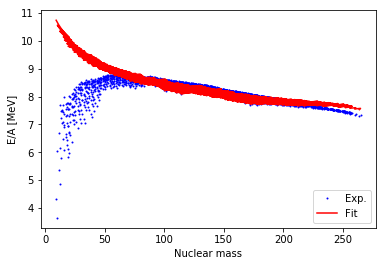

In [75]:
regr_lsq_3par = linear_model.LinearRegression(fit_intercept = False)
regr_lsq_3par.fit(data_x,data_y)
data_y_th = regr_lsq_3par.predict(data_x)

print("Coefficients: ",regr_lsq_3par.coef_)
print("rms error [MeV]: ",rmserror(data_y_th,data_y))

# Figures for the second fit
plt.figure()
plt.plot(nmass,data_y/nmass,'bo',markersize = 2, markeredgewidth = 0.0)
plt.plot(nmass,data_y_th/nmass,'r-')
plt.xlabel("Nuclear mass")
plt.ylabel("E/A [MeV]")
plt.legend(("Exp.","Fit"),loc = "lower right")
plt.show()

For alpha =  0.01  coef:  [ 7.52027937  7.35685952 -0.16499513]  and rms:  24.68433574013183  MeV


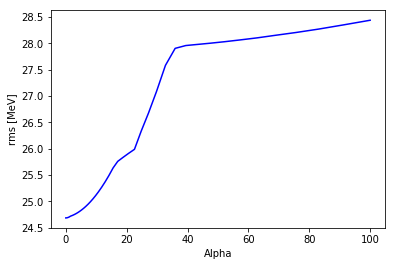

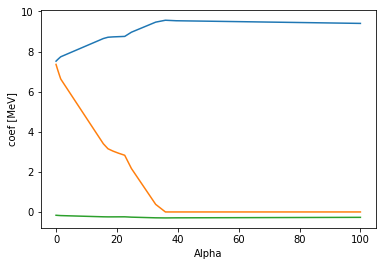

In [77]:
# Lasso regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Lasso(fit_intercept = False, alpha = a, max_iter = 5000)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")
    
plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

For alpha =  0.01  coef:  [ 7.51872737  7.36200935 -0.16488018]  and rms:  24.684334077147227  MeV


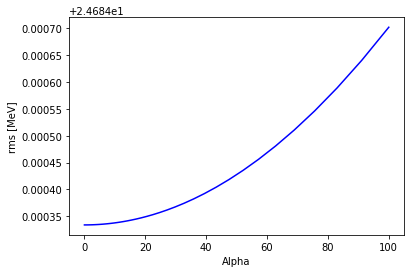

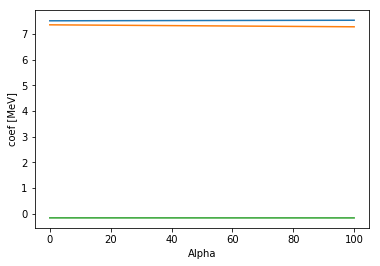

In [78]:
# Ridge regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Ridge(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

### 4 parameters, volume, surface, Coulomb and asymmetry

In [79]:
asym = np.power(nmass - 2*nproton,2.0)/nmass
data_x = np.column_stack([nmass, surf, coul, asym])

Coefficients:  [ 15.53037403 -16.94523239  -0.70161639 -22.94549678]
rms error [MeV]:  3.144497130277393


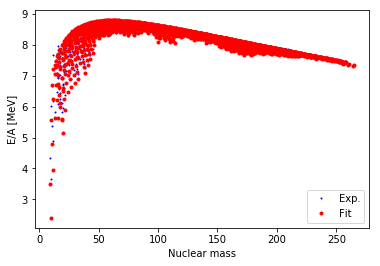

In [81]:
regr_lsq_4par = linear_model.LinearRegression(fit_intercept = False)
regr_lsq_4par.fit(data_x,data_y)
data_y_th = regr_lsq_4par.predict(data_x)

print("Coefficients: ",regr_lsq_4par.coef_)
print("rms error [MeV]: ",rmserror(data_y_th,data_y))

# Figures for the second fit
plt.figure()
plt.plot(nmass,data_y/nmass,'bo',markersize = 2, markeredgewidth = 0.0)
plt.plot(nmass,data_y_th/nmass,'r.')
plt.xlabel("Nuclear mass")
plt.ylabel("E/A [MeV]")
plt.legend(("Exp.","Fit"),loc = "lower right")
plt.show()

For alpha =  0.01  coef:  [ 14.11154243 -12.60301441  -0.60288414 -19.74735047]  and rms:  4.961224454584944  MeV


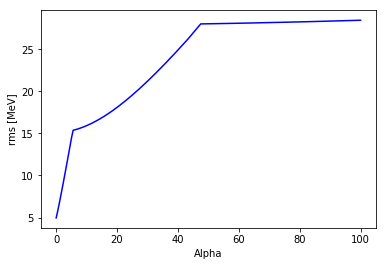

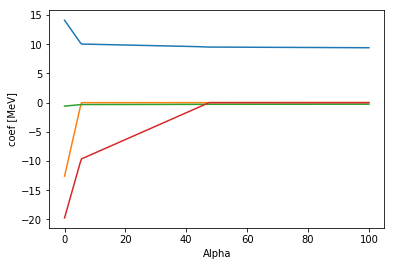

In [82]:
# Lasso regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Lasso(fit_intercept = False, alpha = a, max_iter = 5000)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")
    
plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

For alpha =  0.01  coef:  [ 15.53029938 -16.94500251  -0.70161135 -22.94531044]  and rms:  3.144497137072973  MeV


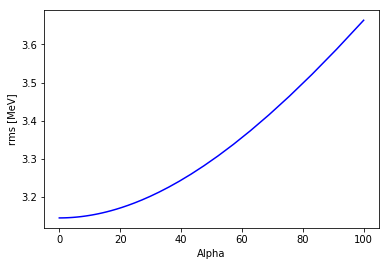

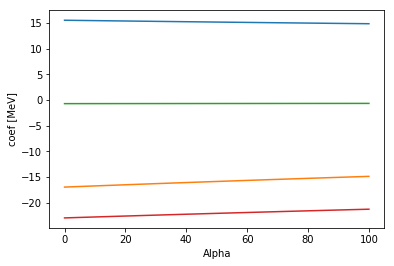

In [83]:
# Ridge regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Ridge(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

### 5 parameters

In [85]:
pairing = oddeven_eff/np.power(nmass,1.0/2.0)
data_x = np.column_stack([nmass, surf, coul, asym, pairing])

Coefficients:  [ 15.55108963 -17.00954117  -0.70312945 -22.98228012  12.32856735]
rms error [MeV]:  3.0040159640823134


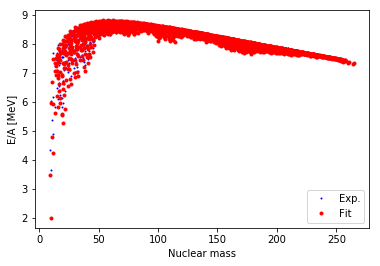

In [86]:
regr_lsq_5par = linear_model.LinearRegression(fit_intercept = False)
regr_lsq_5par.fit(data_x,data_y)
data_y_th = regr_lsq_5par.predict(data_x)

print("Coefficients: ",regr_lsq_5par.coef_)
print("rms error [MeV]: ",rmserror(data_y_th,data_y))

# Figures for the second fit
plt.figure()
plt.plot(nmass,data_y/nmass,'bo',markersize = 2, markeredgewidth = 0.0)
plt.plot(nmass,data_y_th/nmass,'r.')
plt.xlabel("Nuclear mass")
plt.ylabel("E/A [MeV]")
plt.legend(("Exp.","Fit"),loc = "lower right")
plt.show()

For alpha =  0.01  coef:  [ 14.12285547 -12.63819403  -0.60371489 -19.76681293   7.5185764 ]  and rms:  4.889672673801699  MeV


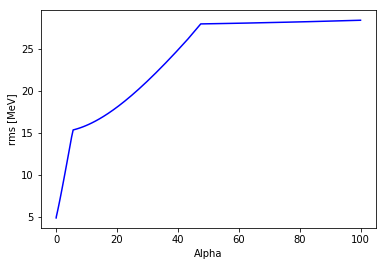

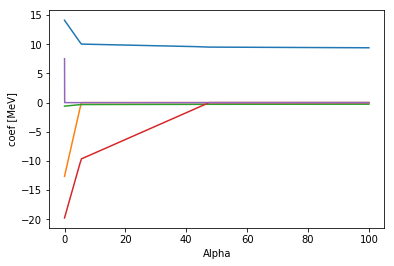

In [87]:
# Lasso regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Lasso(fit_intercept = False, alpha = a, max_iter = 5000)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")
    
plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()

For alpha =  0.01  coef:  [ 15.55099787 -17.00925816  -0.70312315 -22.98206327  12.31849423]  and rms:  3.0040160672061966  MeV


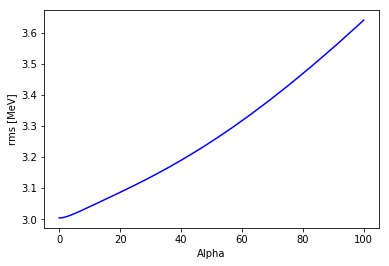

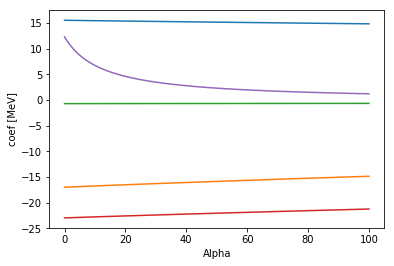

In [88]:
# Ridge regression
rms_list = []
coef_list = []
for a in alpha_list:
    regr = linear_model.Ridge(fit_intercept = False, alpha = a)
    regr.fit(data_x, data_y)
    data_y_th = regr.predict(data_x)

    rms_list.append(rmserror(data_y_th, data_y))
    coef_list.append(regr.coef_)

print("For alpha = ", alpha_list[0], " coef: ", coef_list[0], " and rms: ", rms_list[0], " MeV")

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(rms_list), 'b-')
plt.xlabel("Alpha")
plt.ylabel("rms [MeV]")
plt.show()

plt.figure()
plt.plot(np.asarray(alpha_list), np.asarray(coef_list))
plt.xlabel("Alpha")
plt.ylabel("coef [MeV]")
plt.show()